In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

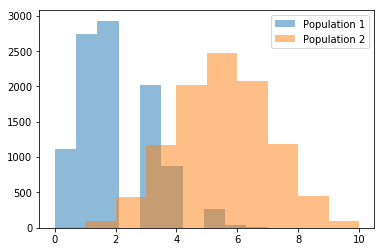

In [4]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000)
plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

Drill 1. Increasing the sample sizes from 100 to 1000. <br><br> Increasing the sample size by a factor of 10 would decrease the standard error of the mean by a factor equal to the sqrt(10). Because the both samples have a fairly large number of observation (100 and 1000) the calculated means of the samples are both likely to be close to the population mean and hover around it. However, it's more likely that the sample mean with 1000 observations will fall closer to the population mean, although not guaranteed. <br><br> Decreasing the sample size to 20 observations. <br><br> This is would certainly increase the standard error of the mean, likely increase the sample standard deviation, and finally the mean is more likely to stray further from the population mean. This is because the statistically accepted number of observations required for a sample to be considered large enough is 30 observations.

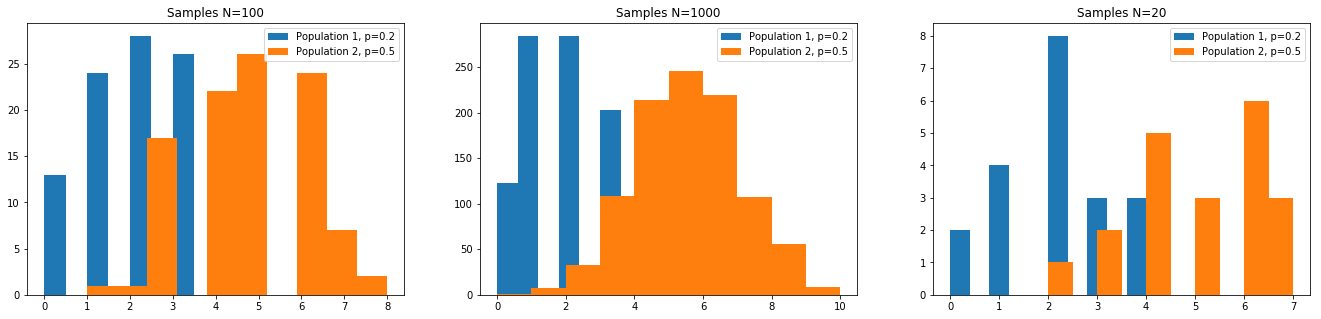

Pop1 Sample N=100 Mean:  1.96
Pop1 Sample N=100 StdDev:  1.215894732285653
Pop1 Sample N=100 StdErrMean:  1.7774937522244094

Pop1 Sample N=1000 Mean:  1.911
Pop1 Sample N=1000 StdDev:  1.2357503793242388
Pop1 Sample N=1000 StdErrMean:  1.7190769248664268

Pop1 Sample N=20 Mean:  2.05
Pop1 Sample N=20 StdDev:  1.16081867662439
Pop1 Sample N=20 StdErrMean:  1.902705911956557

Pop2 Sample N=100 Mean:  4.81
Pop2 Sample N=100 StdDev:  1.3468110483657312
Pop2 Sample N=100 StdErrMean:  4.144687021560878

Pop2 Sample N=1000 Mean:  5.076
Pop2 Sample N=1000 StdDev:  1.5421491497257975
Pop2 Sample N=1000 StdErrMean:  4.087506196530734

Pop2 Sample N=20 Mean:  5.0
Pop2 Sample N=20 StdDev:  1.4142135623730951
Pop2 Sample N=20 StdErrMean:  4.204482076268573



In [28]:
sam1a = np.random.choice(pop1, 100, replace=True)
sam2a = np.random.choice(pop2, 100, replace=True)
sam1b = np.random.choice(pop1, 1000, replace=True)
sam2b = np.random.choice(pop2, 1000, replace=True)
sam1c = np.random.choice(pop1, 20, replace=True)
sam2c = np.random.choice(pop2, 20, replace=True)

plt.figure(figsize=(23, 5))

plt.subplot(1,3,1)
plt.hist(sam1a, label='Population 1, p=0.2')
plt.hist(sam2a, label='Population 2, p=0.5')
plt.legend(loc="upper right")
plt.title("Samples N=100")

plt.subplot(1,3,2)
plt.hist(sam1b, label='Population 1, p=0.2')
plt.hist(sam2b, label='Population 2, p=0.5')
plt.legend(loc="upper right")
plt.title("Samples N=1000")

plt.subplot(1,3,3)
plt.hist(sam1c, label='Population 1, p=0.2')
plt.hist(sam2c, label='Population 2, p=0.5')
plt.legend(loc="upper right")
plt.title("Samples N=20")

plt.show()

SamName1List = [sam1a,sam1b,sam1c]
SamName2List = [sam2a,sam2b,sam2c]

for sam in SamName1List:
    print("Pop1 Sample N={} Mean: ".format(len(sam),), sam.mean())
    print("Pop1 Sample N={} StdDev: ".format(len(sam)), sam.std())
    print("Pop1 Sample N={} StdErrMean: ".format(len(sam)), sam.mean()/np.sqrt(sam.std()))
    print('')
for sam in SamName2List:
    print("Pop2 Sample N={} Mean: ".format(len(sam),), sam.mean())
    print("Pop2 Sample N={} StdDev: ".format(len(sam)), sam.std())
    print("Pop2 Sample N={} StdErrMean: ".format(len(sam)), sam.mean()/np.sqrt(sam.std()))
    print('')

In [29]:
#    SamName1List = [sam1a,sam1b,sam1c]
#    SamName2List = [sam2a,sam2b,sam2c]
#
#    for sam in SamName1List:
#        print("Pop1 Sample N={} Mean: ".format(len(sam),), sam.mean())
#        print("Pop1 Sample N={} StdDev: ".format(len(sam)), sam.std())
#        print("Pop1 Sample N={} StdDevMean: ".format(len(sam)), sam.mean()/np.sqrt(sam.std()))
#        print('')
#    for sam in SamName2List:
#        print("Pop2 Sample N={} Mean: ".format(len(sam),), sam.mean())
#        print("Pop2 Sample N={} StdDev: ".format(len(sam)), sam.std())
#        print("Pop2 Sample N={} StdDevMean: ".format(len(sam)), sam.mean()/np.sqrt(sam.std()))
#        print('')

Drill 2. Changing Population 1 Probability <br><br>
As the probability value of Population 1 increases (or as the p-value approaches that of Pop2) the mean difference would decrease. This will be apparent in the way the histograms of population samples will increasingly overlap as p increases. <br><br> The Standard Error of the mean difference would actually stay the same because the standard deviations of the sample would not change due to a change in the probability value of the sampled populations. <br><br> Lastly, because the mean difference is decreasing, the t-value would decrease, indicating that there's greater probability that the population means of the corresponding samples are not different.

In [61]:
pop1a = np.random.binomial(10, 0.3, 10000)
pop1b = np.random.binomial(10, 0.4, 10000)

sam1d = np.random.choice(pop1a, 100, replace = True)
sam1e = np.random.choice(pop1b, 100, replace = True)

from scipy.stats import ttest_ind

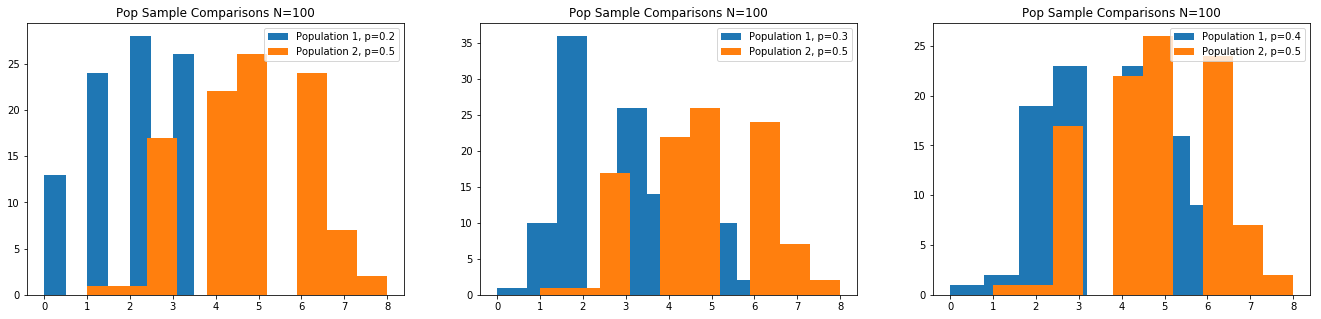

Comparing samples from populations with p=0.2 and p=0.5
Ttest_indResult(statistic=15.628336596638006, pvalue=2.7698410063903266e-36)

Comparing samples from populations with p=0.3 and p=0.5
Ttest_indResult(statistic=10.392403217799806, pvalue=1.8270837466044047e-20)

Comparing samples from populations with p=0.4 and p=0.5
Ttest_indResult(statistic=4.498940817286695, pvalue=1.1814495750473461e-05)



In [63]:
plt.figure(figsize=(23, 5))

plt.subplot(1,3,1)
plt.hist(sam1a, label='Population 1, p=0.2')
plt.hist(sam2a, label='Population 2, p=0.5')
plt.legend(loc="upper right")
plt.title("Pop Sample Comparisons N=100")

plt.subplot(1,3,2)
plt.hist(sam1d, label='Population 1, p=0.3')
plt.hist(sam2a, label='Population 2, p=0.5')
plt.legend(loc="upper right")
plt.title("Pop Sample Comparisons N=100")

plt.subplot(1,3,3)
plt.hist(sam1e, label='Population 1, p=0.4')
plt.hist(sam2a, label='Population 2, p=0.5')
plt.legend(loc="upper right")
plt.title("Pop Sample Comparisons N=100")
plt.show()

print("Comparing samples from populations with p=0.2 and p=0.5")
print(ttest_ind(sam2a, sam1a, equal_var=False))
print("")
print("Comparing samples from populations with p=0.3 and p=0.5")
print(ttest_ind(sam2a, sam1d, equal_var=False))
print("")
print("Comparing samples from populations with p=0.4 and p=0.5")
print(ttest_ind(sam2a, sam1e, equal_var=False))
print("")

In [43]:
def meandiff(sam1,sam2):
    return abs(sam1.std() - sam2.std())
def StdErrDiff(sam1, sam2):
    return np.sqrt(((np.var(sam1))/len(sam1)) + ((np.var(sam2))/len(sam2)))
def tval(sam1,sam2):
    return meandiff(sam1,sam2)/StdErrDiff(sam1,sam2)

In [60]:
tval(sam1a,sam2a)

0.7215128579442012

Drill 3. Changing the population distribution and comparing the sample mean values.<br><br> Because of the central limit theorem, the samples of any distribution will converge to normal when enough observations are in the sample. Therefore, I predict that the sample means will still accurately represent their respective population means.

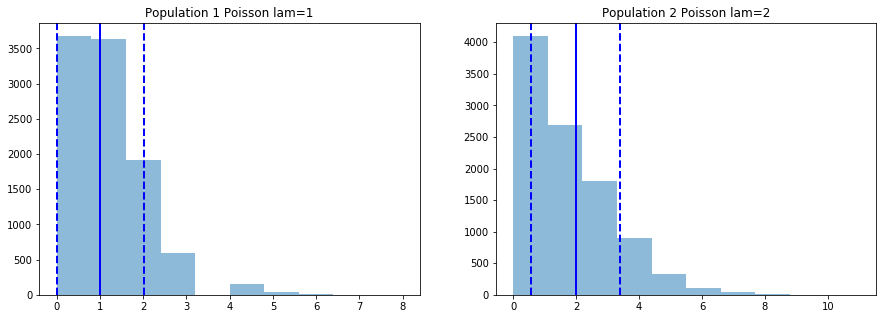

Poisson Lam = 1 Mean:  1.0048
Poisson Lam = 2 Mean:  1.9901


In [66]:
pop1c = np.random.poisson(1, 10000)
pop2a = np.random.poisson(2, 10000)

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(pop1c, alpha=0.5) 
plt.title("Population 1 Poisson lam=1")
plt.axvline(pop1c.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(pop1c.mean() - pop1c.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(pop1c.mean() + pop1c.std(), color='b', linestyle='dashed', linewidth=2)

plt.subplot(1,2,2)
plt.hist(pop2a, alpha=0.5) 
plt.title('Population 2 Poisson lam=2')
plt.axvline(pop2a.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(pop2a.mean() - pop2a.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(pop2a.mean() + pop2a.std(), color='b', linestyle='dashed', linewidth=2)

plt.show()

print("Population Poisson Lam = 1 Mean: ", pop1c.mean())
print("Population Poisson Lam = 2 Mean: ", pop2a.mean())

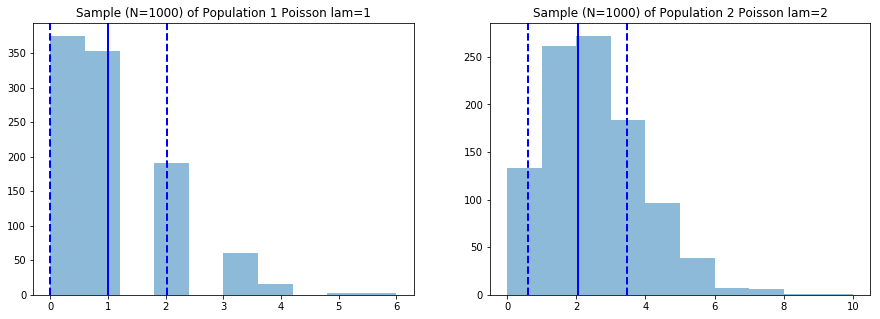

Sample Pop Poisson Lam = 1 Mean:  1.004
Sample Pop Poisson Lam = 2 Mean:  2.038


In [70]:
sam1f = np.random.choice(pop1c, 1000, replace=True)
sam2d = np.random.choice(pop2a, 1000, replace=True)

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(sam1f, alpha=0.5) 
plt.title("Sample (N=1000) of Population 1 Poisson lam=1")
plt.axvline(sam1f.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(sam1f.mean() - sam1f.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(sam1f.mean() + sam1f.std(), color='b', linestyle='dashed', linewidth=2)

plt.subplot(1,2,2)
plt.hist(sam2d, alpha=0.5) 
plt.title('Sample (N=1000) of Population 2 Poisson lam=2')
plt.axvline(sam2d.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(sam2d.mean() - sam2d.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(sam2d.mean() + sam2d.std(), color='b', linestyle='dashed', linewidth=2)

plt.show()

print("Sample Pop Poisson Lam = 1 Mean: ", sam1f.mean())
print("Sample Pop Poisson Lam = 2 Mean: ", sam2d.mean())